# Lab: Forecasting

In this lab, we will explore the python package [statsmodels](http://www.statsmodels.org/dev/tsa.html) to forecast the time series data. You will learn to use different time series modeling technique for forecasting.

In [1]:
# # install packages
# import sys
# !pip3 install --prefix {sys.prefix} statsmodels

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

----------

## Air Passenger Dataset
This dataset provides monthly totals of international airline passengers from 1949 to 1960. You can find a copy of the dataset on [Kaggle](https://www.kaggle.com/rakannimer/air-passengers) or [R datasets](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/AirPassengers.html).

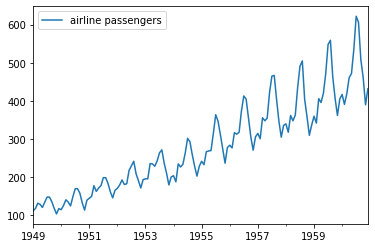

In [3]:
df = pd.read_csv('airline-passengers.csv', index_col=[0], parse_dates=True)
df.index = pd.DatetimeIndex(df.index.values, freq=df.index.inferred_freq)

# split the data into train and test
train, test = df.iloc[:130, [0]], df.iloc[130:, [0]]

df.plot()
pyplot.show()

## Time Series Decomposition
The decomposition of time series is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns, including:

- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series.
- Noise: The random variation in the series.

There are two main ways to decomposite the dataset: the additive decomposition and the multiplicative decomposition.

### Additive Decomposition

In additive decomposition, different components are put together through addition. E.g. 

$y_t = Seasonality_t + Trend_t + Noise_t$

**TODO:** Study [seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) API from `statsmodels.tsa.seasonal`, apply additive decomposition to the airline passenger dataset and plot each components from the decomposition.

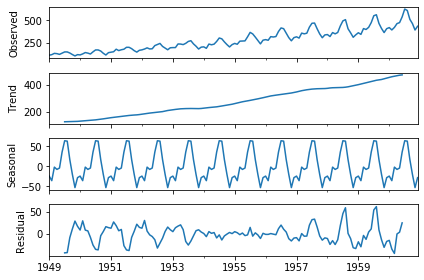

In [4]:
# additive decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['airline passengers'], model='additive')
result.plot()
pyplot.show()

### Multiplicative Decomposition

Similar to additive decomposition, we can decompose a time series through multiplication. E.g. 

$y_t = Seasonality_t * Trend_t * Noise_t$

**TODO:** Study [seasonal_decompose](https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) API from `statsmodels.tsa.seasonal`, apply multiplication decomposition to the same airline passenger dataset and plot each components from the decomposition. Which decomposition makes more sense in this dataset? 

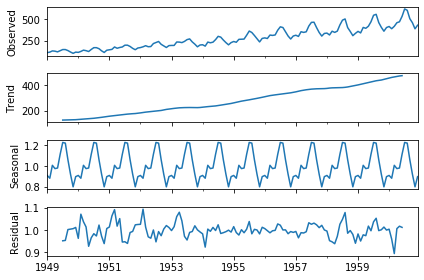

In [5]:
# multiplicative decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['airline passengers'], model='multiplicative')
result.plot()
pyplot.show()

----------

## Simple Exponential Smoothing (SES)
The Simple Exponential Smoothing (SES) method models the next time step as an exponentially weighted linear function of observations at prior time steps. This method is suitable for forecasting data with no clear trend or seasonal pattern. 

**TODO**: you will apply the simple exponential smoothing technique ([SimpleExpSmoothing](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameter `smoothing_level` and see how it impacts the model accuracy. 

In [6]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# fit model
model = SimpleExpSmoothing(train['airline passengers'].astype(np.float))
model_fit = model.fit(smoothing_level=0.8)
# make prediction
z = model_fit.predict(start=test.index[0], end=test.index[-1])
print(z)

print("rmse:" + str(sqrt(mean_squared_error(test, z))))
print("mae:" + str(mean_absolute_error(test, z)))

1959-11-01    421.812195
1959-12-01    421.812195
1960-01-01    421.812195
1960-02-01    421.812195
1960-03-01    421.812195
1960-04-01    421.812195
1960-05-01    421.812195
1960-06-01    421.812195
1960-07-01    421.812195
1960-08-01    421.812195
1960-09-01    421.812195
1960-10-01    421.812195
1960-11-01    421.812195
1960-12-01    421.812195
Freq: MS, dtype: float64
rmse:86.92637222764058
mae:62.09825789699543


----------

## Holt Winter’s Exponential Smoothing (HWES)
Holt Winter’s Exponential Smoothing (HWES) models the time series using an exponentially weighted linear function of prior observations with trends and seasonality taken into account. 

**TODO**: you will apply the HWES technique ([ExponentialSmoothing](https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# fit model
model = ExponentialSmoothing(train['airline passengers'].astype(np.float))
model_fit = model.fit()

# make prediction
z = model_fit.predict(start=test.index[0], end=test.index[-1])
print(z)

print("rmse:" + str(sqrt(mean_squared_error(test, z))))
print("mae:" + str(mean_absolute_error(test, z)))

1959-11-01    407.0
1959-12-01    407.0
1960-01-01    407.0
1960-02-01    407.0
1960-03-01    407.0
1960-04-01    407.0
1960-05-01    407.0
1960-06-01    407.0
1960-07-01    407.0
1960-08-01    407.0
1960-09-01    407.0
1960-10-01    407.0
1960-11-01    407.0
1960-12-01    407.0
Freq: MS, dtype: float64
rmse:94.83481880165563
mae:67.35714285714286


-----

## ARIMA model

### Autoregression model

The autoregression (AR) method models the time series using a linear function of the observations at prior time steps. The notation for the model involves specifying the order of the model as a parameter to the auto regression function. E.g. AR(1) is a first-order AR model.

**TODO**: you will apply Autoregression model ([AR](http://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AR.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [8]:
# AR example
from statsmodels.tsa.ar_model import AR
from random import random

# fit model
p = 2
model = AR(train['airline passengers'].astype(np.float))
model_fit = model.fit(maxlag=1)

# make prediction
z = model_fit.predict(start=test.index[0], end=test.index[-1])
print(z)

print("rmse:" + str(sqrt(mean_squared_error(test, z))))
print("mae:" + str(mean_absolute_error(test, z)))

1959-11-01    402.885833
1959-12-01    398.950202
1960-01-01    395.185359
1960-02-01    391.583893
1960-03-01    388.138714
1960-04-01    384.843040
1960-05-01    381.690383
1960-06-01    378.674537
1960-07-01    375.789565
1960-08-01    373.029787
1960-09-01    370.389770
1960-10-01    367.864319
1960-11-01    365.448460
1960-12-01    363.137439
Freq: MS, dtype: float64
rmse:116.30643311322478
mae:87.5948679706339


----------

### Moving Average Model

The moving average model models the time series with a linear function of the residual errors from a mean process at prior time steps. Similar to AR model, the notation for the model specifies the order of the model q as a parameter to the moving average function, e.g. MA(1) is a first-order MA model.

**TODO**: you will apply Moving Average model ([ARMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [9]:
# MA example
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(train['airline passengers'].astype(np.float), order=(0, 1))
model_fit = model.fit()

# make prediction
z = model_fit.predict(start=test.index[0], end=test.index[-1])
print(z)

print("rmse:" + str(sqrt(mean_squared_error(test, z))))
print("mae:" + str(mean_absolute_error(test, z)))

1959-11-01    333.580885
1959-12-01    260.510191
1960-01-01    260.510191
1960-02-01    260.510191
1960-03-01    260.510191
1960-04-01    260.510191
1960-05-01    260.510191
1960-06-01    260.510191
1960-07-01    260.510191
1960-08-01    260.510191
1960-09-01    260.510191
1960-10-01    260.510191
1960-11-01    260.510191
1960-12-01    260.510191
Freq: MS, dtype: float64
rmse:214.8506460993133
mae:197.1990448460127


----------

## Autoregressive Moving Average (ARMA)

The Autoregressive Moving Average model (ARMA) models the time series using a linear function of the observations and resiudal errors from observation of previous time stamps. Basically, ARMA is a combination of both Autoregression (AR) and Moving Average (MA) models.

**TODO**: you will apply Moving Average model ([ARMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [10]:
# ARMA example
from statsmodels.tsa.arima_model import ARMA

# fit model
model = ARMA(train['airline passengers'].astype(np.float), order=(2, 1))
model_fit = model.fit()

# make prediction
z = model_fit.predict(start=test.index[0], end=test.index[-1])
print(z)

print("rmse:" + str(sqrt(mean_squared_error(test, z))))
print("mae:" + str(mean_absolute_error(test, z)))

1959-11-01    396.573074
1959-12-01    391.286344
1960-01-01    383.826797
1960-02-01    378.029956
1960-03-01    371.844010
1960-04-01    366.328162
1960-05-01    360.899599
1960-06-01    355.843999
1960-07-01    350.989414
1960-08-01    346.406673
1960-09-01    342.039374
1960-10-01    337.899272
1960-11-01    333.963028
1960-12-01    330.226701
Freq: MS, dtype: float64
rmse:135.0419934426746
mae:107.4278390315893


----------

### Autoregressive Integrated Moving Average (ARIMA)

The Autoregressive Integrated Moving Average model (ARIMA) is similar to ARMA model except that it also models a differencing pre-processing step of the sequence to make the time series stationary.

**TODO**: you will apply Moving Average model ([ARIMA](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html) API) to the airline dataset and report the prediction accuracy (RMSE and MAE) on the test dataset. Try to play around with the hyper-parameters in the API and see how it impacts the model accuracy. 

In [11]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(train['airline passengers'].astype(np.float), order=(2, 1, 1))
model_fit = model.fit(disp=False)

# make prediction
z = model_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')
print(z)

print("rmse:" + str(sqrt(mean_squared_error(test, z))))
print("mae:" + str(mean_absolute_error(test, z)))

1959-11-01    388.133674
1959-12-01    396.410387
1960-01-01    415.819295
1960-02-01    433.887346
1960-03-01    444.976790
1960-04-01    449.135462
1960-05-01    449.210553
1960-06-01    448.277249
1960-07-01    448.270994
1960-08-01    449.773692
1960-09-01    452.459126
1960-10-01    455.683732
1960-11-01    458.908792
1960-12-01    461.867029
Freq: MS, dtype: float64
rmse:73.09248715568899
mae:51.12379581368593


**TODO**: After running through various time series models, summarize your findings. 

# End of Lab: Forecasting